<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

--2021-05-31 22:46:24--  http://titanic.csv/
Resolving titanic.csv (titanic.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘titanic.csv’
--2021-05-31 22:46:24--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  59.76K  --.-KB/s    in 0.01s   

2021-05-31 22:46:24 (5.51 MB/s) - ‘titanic.csv’ saved [61194/61194]

FINISHED --2021-05-31 22:46:24--
Total wall clock time: 0.3s
Downloaded: 1 files, 60K in 0.01s (5.51 MB/s)


### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [3]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv("titanic.csv")
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
Nan,0.000000,0.000000,0.000000,177.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,19.865320,0.000000,0.000000,0.000000


In [4]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch
df2 = df[['Survived' , 'Pclass' , 'Sex' , 'Age' , 'SibSp' , 'Parch']]
df2

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0


In [6]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes

df2 = df2.dropna(subset=['Age'] , how='all' )
df2.isnull().any()



Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
dtype: bool

In [7]:
# Alumno: Fin de la limpieza, especifique cuantas filas se poseen para analizar
df2.shape

(714, 6)

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [8]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


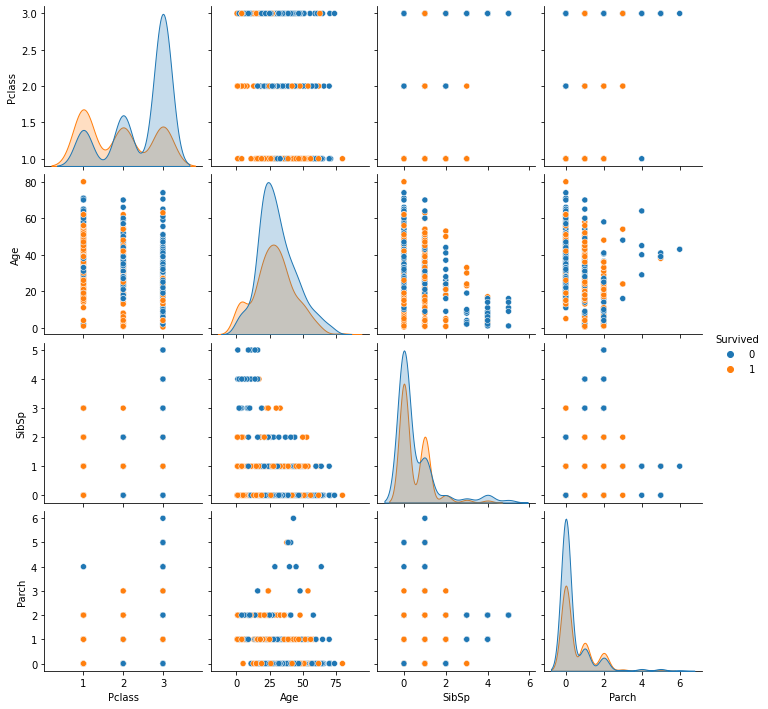

In [9]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o nó
sns.pairplot(data = df2 , hue='Survived')

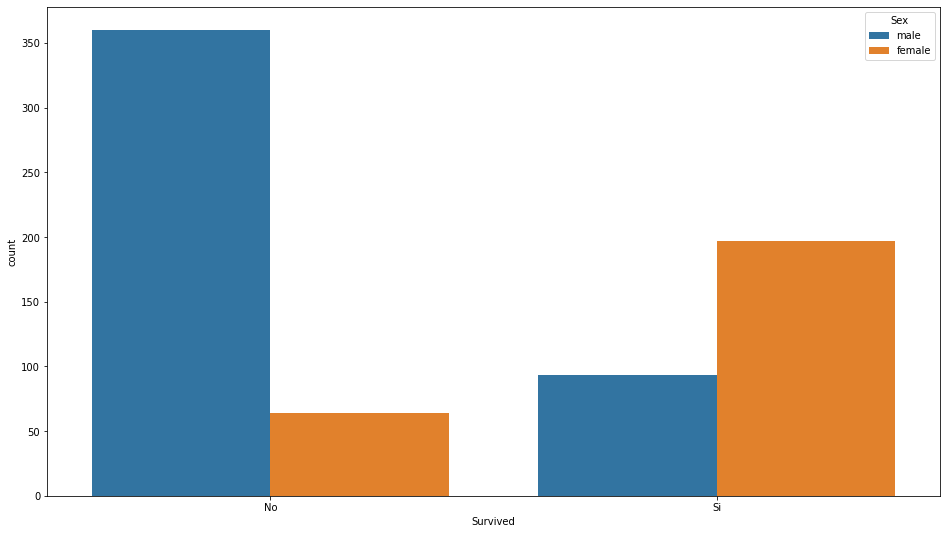

In [10]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
sns.countplot(x=df2['Survived'].replace({0: 'No', 1: 'Si'} ) , hue=df2['Sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


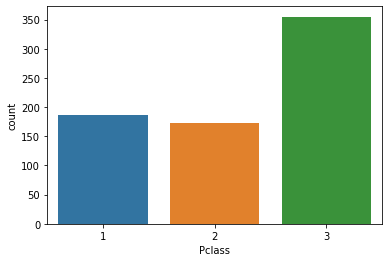

In [11]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot
sns.countplot(df2['Pclass'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


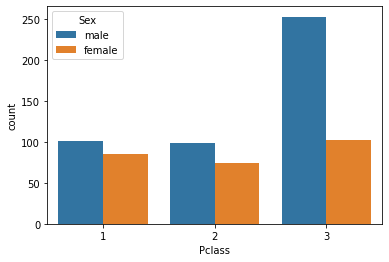

In [12]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sns.countplot(df2['Pclass'], hue=df2['Sex'])

#### Transformar variables categóricas texto a clases numeradas

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_cod = df2.copy()

In [15]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!
le = LabelEncoder()
label_encoding = le.fit_transform(df_cod['Sex'])
df_cod['Sex'] = label_encoding
df_cod.head()


,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [16]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)
le.classes_

array(['female', 'male'], dtype=object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


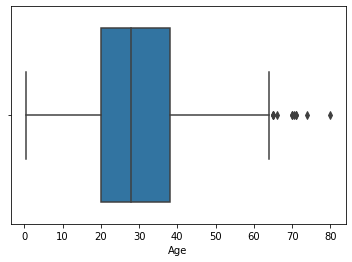

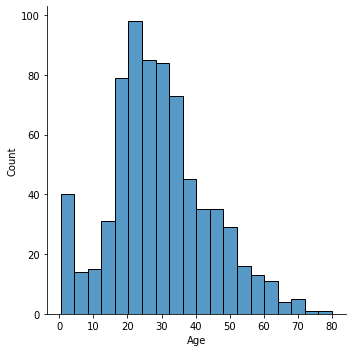

In [17]:
# Alumno: Analizar la distribución de la edad
ax = fig.add_subplot()
ax = sns.boxplot(df2['Age'])
ax1 = sns.displot(df2['Age'])

In [18]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_cod = df_cod.copy()
df_cod.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [19]:
# Alumno: utilizar StandarScaler para normalizar la column de "Age"
# Conservar el scaler que lo necesitará para el final
from sklearn.preprocessing import StandardScaler
df_norm = df_cod.copy()
age_scaler = StandardScaler()
df_norm.loc[:, 'Age'] = age_scaler.fit_transform(df_cod[['Age']])
df_norm


,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,-0.530377,1,0
1,1,1,0,0.571831,1,0
2,1,3,0,-0.254825,0,0
3,1,1,0,0.365167,1,0
4,0,3,1,0.365167,0,0
...,...,...,...,...,...,...
885,0,3,0,0.640719,0,5
886,0,2,1,-0.185937,0,0
887,1,1,0,-0.737041,0,0
889,1,1,1,-0.254825,0,0


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [20]:
# Alumno: genere un numpy array "X" que posea todos los feutres (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived
X = df_norm.drop(['Survived'] , axis = 1)
y = df_norm[['Survived']].values
X.shape

(714, 5)

In [21]:
# Alumno: obtener la cantidad de features (cantidad de columnas)
# y almacenar en in_shape
in_shape = X.shape[1]
in_shape

5

In [22]:
# Alumno: crear una variable out_shape indicando cuandas neuronas de salida desea
out_shape = y.shape[1]
out_shape  

1

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 80%20%

In [23]:
# Alumno, generar los dataset de train y test superando en 80%20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from keras.layers import Dense
# Alumno: crear un modelo secuencial de dos capas (hidden y output).
# Coloque correctamente el valor de in_shape y out_shape en el modelo
# pero seleccione por su cuenta la cantidad de neuronas en la capa oculta
def create_model( hidden_neurons ):
  model = Sequential()
  
  model.add(Dense(units=hidden_neurons , activation='sigmoid' , input_shape=(in_shape,)))

  model.add(Dense(units=out_shape, activation='sigmoid'))

  return model


In [26]:
# Alumno: compilar el modelo con binary_crossentropy y métrica de "accuracy"
model = create_model( 8 )
model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.005),
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [27]:
# Alumno: entrenar el modelo, seleccionar un 20% para el dataset de validacion
# Queda a su gusto seleccionar la cantidad de épocas
# Utilizar un batch_size de 64
# Almacenar la salida del fit en una variable "history"
history = model.fit(X_train , y_train , validation_split=0.2 , epochs=100 , batch_size = 64)

Epoch 1/100
8/8 [==============================] - 14s 67ms/step - loss: 0.7966 - accuracy: 0.3844 - val_loss: 0.7275 - val_accuracy: 0.4174
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.7388 - accuracy: 0.3636 - val_loss: 0.6981 - val_accuracy: 0.5304
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7003 - accuracy: 0.5703 - val_loss: 0.6853 - val_accuracy: 0.5826
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6758 - accuracy: 0.6256 - val_loss: 0.6788 - val_accuracy: 0.5478
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6636 - accuracy: 0.5891 - val_loss: 0.6771 - val_accuracy: 0.5565
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6558 - accuracy: 0.6056 - val_loss: 0.6768 - val_accuracy: 0.5565
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6549 - accuracy: 0.6009 - val_loss: 0.6751 - val_accuracy: 0.5478
Epoch 8/100
8/8 [========

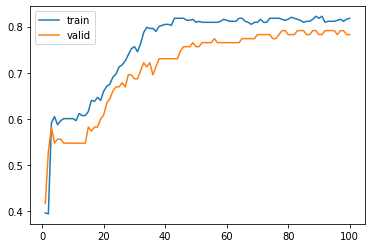

In [28]:
# Alumno: Graficar la evolución del accuracy durante el entrenamiento
# tanto para el dataset de train y el de valid en un gráfico
# plot line
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [29]:
# Alumno: obtener la probabilidad de sobreviir (y_hat_prob)
# realizando una prediccion (predict) con el dataset de test
y_hat_prob = model.predict(X_test)

In [30]:
# Alumno: transformar las probabilidads en 0 y 1, si la probabilidad es
# mayor o igual a 0.5 definir que la persona sobrevivió (1)
# Estos valores guardarlos en y_hat
y_hat =  [1 if x >= 0.5 else 0 for x in y_hat_prob]
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 48        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [31]:
# Alumno, calcular la exactitud (accuracy) de su modelo
accuracy = model.evaluate(X_test , y_test)
accuracy[1]

5/5 [==============================] - 0s 2ms/step - loss: 0.4932 - accuracy: 0.7622


0.7622377872467041

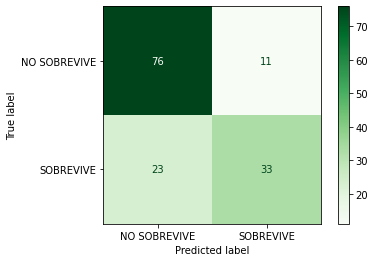

In [32]:
# Alumno, dibujar la matriz de confusion
# definir display_labels=['NO SOBREVIVE', 'SOBREVIVE']
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
cm = confusion_matrix(y_test , y_hat)
cmd = ConfusionMatrixDisplay(cm,display_labels=['NO SOBREVIVE' , 'SOBREVIVE'])
cmd.plot(cmap=plt.cm.Greens)
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [36]:
pip install gradio

     |████████████████████████████████| 1.4MB 7.0MB/s 
     |████████████████████████████████| 215kB 19.9MB/s 
     |████████████████████████████████| 1.9MB 18.2MB/s 
     |████████████████████████████████| 962kB 43.0MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
     |████████████████████████████████| 3.2MB 39.8MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-cp37-none-any.whl size=4710 sha256=72664997b51328eec5c4509310baef3b73073e84e6171c3e7199c3d3627220be
  Stored in directory: /root/.cache/pip/wheels/cc/ac/c4/bef572cb7e52bfca170046f567e64858632daf77e0f34e5a74
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-cp37-none-any.whl size=3372 sha256=25ab16f0045767d33d3f1c5fa74427ec1fa42ad62ef9ccb5a0174124c33300f5
  Stored in directory: /root/.cache/pip/wheels/9f/fc/a7/ab5712c3ace9a8f97276465cc2937316ab8063c1fea488ea77
Successfully built ffmpy flask-cachebuster


In [69]:
# Alumno, pona a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores
# Recordar que los datos de edad (Age) se normalizaron, debe utilizar ese
# scaler generado para transformarlo
import gradio as gr

#Survived	Pclass	Sex	Age	SibSp	Parch
#Sibsp = 0
#Parch = 0


def survived( age, sex, clas ):
    

  iface = gr.Interface(
      fn=survived,
      
      sex = gr.inputs.Dropdown('Hombre', 'Mujer' , label = "Sex") ,
      age = gr.inputs.Slider(minimum=0, maximum=120, default=22, label="Age"),
      clas = gr.inputs.Dropdown('1', '2' , '3', label = "Clase"),
      outputs="text",
      layout="vertical")

iface.launch()


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://29223.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7875/',
 'https://29223.gradio.app')

In [ ]:
!pip install gradio

     |████████████████████████████████| 1.3MB 32.6MB/s 
     |████████████████████████████████| 215kB 44.2MB/s 
     |████████████████████████████████| 1.9MB 37.2MB/s 
     |████████████████████████████████| 71kB 11.5MB/s 
     |████████████████████████████████| 3.2MB 44.4MB/s 
     |████████████████████████████████| 962kB 32.6MB/s 
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-cp37-none-any.whl size=3372 sha256=487991c163c17bf9d628048823290093be76afcf676e00963f5ecf8a25d4bc35
  Stored in directory: /root/.cache/pip/wheels/9f/fc/a7/ab5712c3ace9a8f97276465cc2937316ab8063c1fea488ea77
  Created wheel for ffmpy: filename=ffmpy-0.3.0-cp37-none-any.whl size=4710 sha256=8172f91d585d50afd93452ec3472c9e4f364cac36ed552e997714a391f5d55ca
  Stored in directory: /root/.cache/pip/wheels/cc/ac/c4/bef572cb7e52bfca170046f567e64858632daf77e0f34e5a74
Successfully built flask-cachebuster ffmpy
